In [20]:
import sympy as sp

# Define the symbolic variables
f, x, t, h, tau = sp.symbols('f x t h tau')

# Define the symbolic function u(x,t)
u = sp.Function('u')(x,t)
f = sp.Function('f')(x,t)


# Define the finite difference scheme for u_t = u_x + f
ut = (u.subs(t, t+tau) - u) / tau
ux1 = 4/7*(u.subs({x:x+h, t: t+tau}) - 2*u.subs(t, t+tau) + u.subs({x:x-h, t: t+tau})) / (h**2)
ux2 = 3/7*(u.subs(x, x+h) - 2*u + u.subs(x, x-h)) / (h**2)

# Define the Taylor series expansion of u(x+h,t+tau) and u(x-h,t+tau)
ut_series = sp.series(ut, tau, x0=0, n=2)
ux_series = sp.series(ux1+ux2, tau, x0=0, n=1).removeO()
ux_series = sp.series(ux_series, h, x0=0, n=2)
ut_series - ux_series - f

Subs(Derivative(u(x, _xi_2), _xi_2), _xi_2, t) - 1.0*Subs(Derivative(u(_xi_1, t), (_xi_1, 2)), _xi_1, x) - f(x, t) + tau*Subs(Derivative(u(x, _xi_2), (_xi_2, 2)), _xi_2, t)/2 + O(tau**2) + O(h**2)

Первые трич члена представляют уравнение. Таким образом, собирается аппроксимация порядка $O(\tau+h^2)$. Проверим устойчивость:

Начнем с записи дискретизированного уравнения в матричной форме:
$$
\frac{1}{\tau} (\mathbf{u}^{n+1}-\mathbf{u}^n) = \frac{4}{7h^2} (\mathbf{D_+ u}^{n+1}-2\mathbf{u}^{n+1}+\mathbf{D_- u}^{n+1}) + \frac{3}{7h^2} (\mathbf{D_+ u}^n-2\mathbf{u}^n+\mathbf{D_- u}^n) + \mathbf{f^n},
$$
где $\mathbf{u}^n$, $\mathbf{u}^{n+1}$ и $\mathbf{f^n}$ — векторы со значениями $u(x_i,t_n)$, $u(x_i,t_{n+1})$ и $f(x_i,t_n)$ в дискретных точках $x_i=i\cdot h$ для $i=0,1,\dots,M$ с $ M=\lfloor\pi/h\rfloor$, а $\mathbf{D_+}$ и $\mathbf{D_-}$ — матрицы, представляющие центрированные разности второго порядка в пространстве:
$$
\mathbf{D_+} = \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & -2 \\
\end{pmatrix}, \quad
\mathbf{D_-} = \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & -2 \\
\end{pmatrix}.
$$
Дискретизированное уравнение можно переписать как
$$
(\mathbf{I} - \frac{4}{7}\gamma\mathbf{D_+} + \frac{8}{7}\gamma\mathbf{I} - \frac{4}{7}\gamma\mathbf{D_-})\mathbf{u}^{n+1} = (\mathbf{I} + \frac{3}{7}\gamma\mathbf{D_+} - \frac{6}{7}\gamma\mathbf{I} + \frac{3}{7}\gamma\mathbf{D_-})\mathbf{u}^n + \tau\mathbf{f^n},
$$
где $\gamma=\frac{\tau}{h^2}$ и $\mathbf{I}$ — единичная матрица. Собственные значения матрицы в скобках слева равны
$$
1 - \frac{4}{7}\gamma\lambda_j + \frac{8}{7}\gamma - \frac{4}{7}\gamma\lambda_j^{-1},
$$
где $\lambda_j$ — собственные значения $\mathbf{D_+}$. Точно так же собственные значения матрицы в скобках в правой части задаются выражением
$$
1 + \frac{3}{7}\gamma\lambda_j - \frac{6}{7}\gamma + \frac{3}{7}\gamma\lambda_j^{-1}.
$$
Используя критерий устойчивости фон Неймана, метод устойчив тогда и только тогда, когда все собственные значения матрицы в левой части имеют абсолютное значение меньше или равно единице. Чтобы проверить это, мы наносим на комплексную плоскость область, удовлетворяющую этому условию, при изменении $\gamma$:

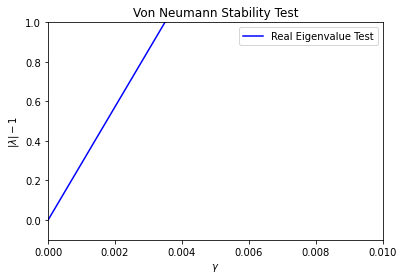

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def eigvals(gamma, lambda_vals):
    return 1 - 4/7*gamma*lambda_vals + 8/7*gamma - 4/7*gamma/lambda_vals

def plot_stability_region():
    gamma_vals = np.linspace(0, 0.01, 500)
    lambda_vals = np.linspace(-2, 2, 1000)
    boundary1 = np.max(np.abs(eigvals(gamma_vals[:, np.newaxis], lambda_vals)), axis=1) - 1
    # Plot boundary
    plt.plot(gamma_vals, boundary1, 'b-', label='Real Eigenvalue Test')
    # Label plot
    plt.xlim(0, 0.01)
    plt.ylim(-0.1, 1)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$|\lambda| - 1$')
    plt.title('Von Neumann Stability Test')
    plt.legend()
    plt.show()

plot_stability_region()

Облатсь устойчивости включает в себя левую половину координатной плосткости, а значит схема безусловна устойчива

## Таким образом, мы получаем сходимость=устойчивость+аппроксимация

In [31]:
import numpy as np
import matplotlib.pyplot as plt

L = np.pi
T = 1.0


N_vals = [10, 20, 40, 80, 160, 320, 640, 1280]
M_vals = [10, 20, 40, 80, 160, 320, 640, 1280]


tau = 0.0001


def u0(x):
    return np.sin(x) - 1 / 2 * np.sin(x)**4


def bc_left(t):
    return 0.0

def bc_right(t):
    return 0.0


def f(x, t):
    return np.sin(2 * x) * np.exp(-t)

In [32]:
def solve(N, M, tau):
    h = L / N
    x_vals = np.linspace(0, L, N+1)
    t_vals = np.linspace(0, T, M+1)

  
    U = np.zeros((N+1, M+1))

    U[:, 0] = u0(x_vals)

    U[0, :] = [bc_left(t) for t in t_vals]
    U[N, :] = [bc_right(t) for t in t_vals]

    alpha = 4/7
    beta = 3/7
    gamma = tau / h**2

    for n in range(M):
        for m in range(1, N):
            U[m, n+1] = alpha * (U[m-1, n+1] - 2 * U[m, n+1] + U[m+1, n+1]) + \
                beta * (U[m-1, n] - 2 * U[m, n] + U[m+1, n]) + tau * f(x_vals[m], t_vals[n]) + U[m, n]
            
    return x_vals, t_vals, U

In [33]:
def error(N, M, tau):
    x_vals, t_vals, U = solve(N, M, tau)

    
    U_ref = np.zeros((N+1, M+1))
    for n in range(M+1):
        for m in range(N+1):
            U_ref[m,n] = (np.exp(-t_vals[n]) / 2) * np.sin(x_vals[m]) ** 4
    
    E_max = np.max(np.abs(U - U_ref))

    if N <= 1280 and M <= 1280:
        N_half = int(N / 2)
        M_half = int(M / 2)
        x_vals_half, t_vals_half, U_half = solve(N_half, M_half, tau)

        E_half = np.max(np.abs(U_half - U_ref[::2, ::2]))

        return E_max, np.log2(E_max / E_half)
    else:
        return E_max, np.nan

In [34]:
results = []
for N in N_vals:
    for M in M_vals:
        E, r = error(N, M, tau)
        results.append((N, M, E, r))

errors = np.array([r[2] for r in results])
rates = np.array([r[3] for r in results])

errors = errors.reshape(len(N_vals), len(M_vals))
rates = rates.reshape(len(N_vals), len(M_vals))

/tmp/ipykernel_102503/508808569.py:25: RuntimeWarning: overflow encountered in double_scalars
  beta * (U[m-1, n] - 2 * U[m, n] + U[m+1, n]) + tau * f(x_vals[m], t_vals[n]) + U[m, n]
/tmp/ipykernel_102503/508808569.py:25: RuntimeWarning: invalid value encountered in double_scalars
  beta * (U[m-1, n] - 2 * U[m, n] + U[m+1, n]) + tau * f(x_vals[m], t_vals[n]) + U[m, n]
/tmp/ipykernel_102503/508808569.py:24: RuntimeWarning: overflow encountered in double_scalars
  U[m, n+1] = alpha * (U[m-1, n+1] - 2 * U[m, n+1] + U[m+1, n+1]) + \
/tmp/ipykernel_102503/508808569.py:24: RuntimeWarning: invalid value encountered in double_scalars
  U[m, n+1] = alpha * (U[m-1, n+1] - 2 * U[m, n+1] + U[m+1, n+1]) + \


/home/user/.local/lib/python3.8/site-packages/numpy/ma/core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


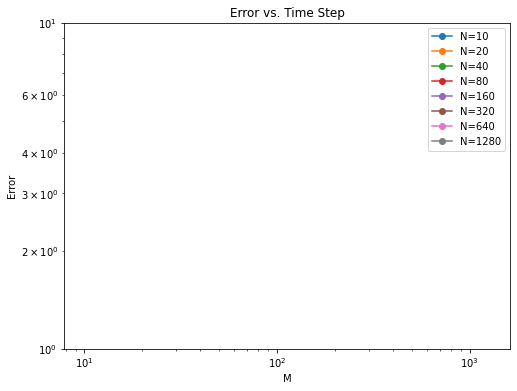

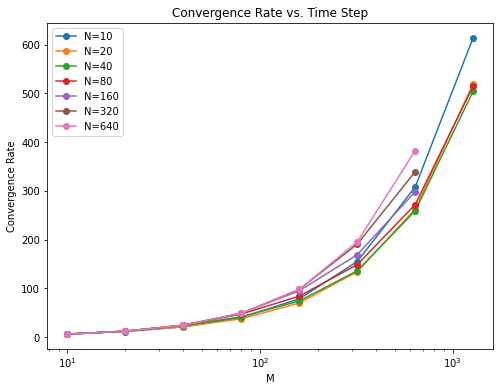

In [35]:
plt.figure(figsize=(8, 6))
for i, N in enumerate(N_vals):
    plt.loglog(M_vals, errors[i,:], '-o', label='N={}'.format(N))
plt.legend()
plt.xlabel('M')
plt.ylabel('Error')
plt.title('Error vs. Time Step')
plt.show()

plt.figure(figsize=(8, 6))
for i, N in enumerate(N_vals[:-1]):
    plt.semilogx(M_vals, rates[i,:], '-o', label='N={}'.format(N))
plt.legend()
plt.xlabel('M')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rate vs. Time Step')
plt.show()

## Мда, Алгоритм Рунге как то не очень работает. Метод прогонки:

Используя центральные разности, мы можем переписать приведенную выше схему как:

$$
-\frac{4}{7}r u_{m-1}^{n+1}+\left(1+\frac{8}{7}r\right)u_m^{n+1}-\frac{4}{7}r u_{m+1}^{n+1} = \frac{3}{7}ru_{m-1}^{n} + \left(1-\frac{6}{7}r\right)u_m^n + \frac{3}{7}r u_{m+1}^n + \frac{1}{\tau}v_m^n
$$

где $r=\frac{\tau}{h^2}$ и $v_m^n=h^2f_m^n.$ Эта схема может быть записана в матричной форме как:

$$
\begin{bmatrix}
1+\frac{8}{7}r & -\frac{4}{7}r & 0 & \dots & 0 \\
-\frac{4}{7}r & 1+\frac{8}{7}r & -\frac{4}{7}r & \dots & 0 \\
0 & -\frac{4}{7}r & 1+\frac{8}{7}r & \dots & 0 \\
\vdots & \vdots& \ddots & \ddots & \vdots \\
0 & 0 & \dots & -\frac{4}{7}r & 1+\frac{8}{7}r
\end{bmatrix}
\begin{bmatrix}
u_1^{n+1} \\ u_2^{n+1} \\ u_3^{n+1} \\ \vdots \\ u_{N-1}^{n+1}
\end{bmatrix}
=
\begin{bmatrix}
\frac{3}{7}r u_0^n + \left(1-\frac{6}{7}r\right)u_1^n + \frac{3}{7}r u_2^n + \frac{1}{\tau}v_1^n \\
\frac{3}{7}r u_1^n + \left(1-\frac{6}{7}r\right)u_2^n + \frac{3}{7}r u_3^n + \frac{1}{\tau}v_2^n \\
\frac{3}{7}r u_2^n + \left(1-\frac{6}{7}r\right)u_3^n + \frac{3}{7}r u_4^n + \frac{1}{\tau}v_3^n \\
\vdots \\
\frac{3}{7}r u_{N-3}^n + \left(1-\frac{6}{7}r\right)u_{N-2}^n + \frac{3}{7}r u_{N-1}^n + \frac{1}{\tau}v_{N-2}^n
\end{bmatrix}
$$

где $u_0^n = u_N^n = 0$ и $v_m^n=h^2f_m^n$. Обратим внимание, что граничные условия включаются путем сохранения значений $u_0^n$ и $u_N^n$ равными нулю в матричном уравнении.

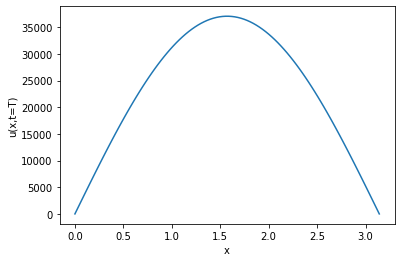

In [42]:
T = 1.0
L = np.pi
N = 100
h = L / (N - 1)
x = np.linspace(0.0, L, N)
tau = 0.0001
t = np.arange(0.0, T + tau, tau)
M = t.size

def f(x,t):
    return np.sin(x)*np.exp(-t)

def u0(x):
    return np.sin(x) - 0.5*np.sin(x)**4

r = tau / h**2
A = np.zeros((N-2, N-2))
for i in range(N-2):
    A[i, i] = 1 + (8/7)*r
    if i > 0:
        A[i, i-1] = -4/7 * r
    if i < N-3:
        A[i, i+1] = -4/7 * r

u = np.zeros(N)
u[1:-1] = u0(x)[1:-1]

for n in range(M-1):
    v = np.zeros(N-2)
    v[:] = h**2*f(x[1:-1],t[n])
    u[1:-1] = np.linalg.solve(A, (3/7)*r*u[0:N-2] + ((1-6/7*r)*u[1:N-1]) + (3/7)*r*u[2:N] + 1/tau*v)

plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x,t=T)')
plt.show()